SOBRE O DATASET

Nome: bank-full.csv
Fonte: Kaggle
Link: https://www.kaggle.com/datasets/nimishsawant/bankfull
Descrição: Este dataset está relacionado a campanhas de marketing de uma instituição bancária portuguesa. As campanhas foram baseadas em ligações telefônicas.

DESCRIÇÃO DAS COLUNAS
Age: Idade
Job: Emprego
Marital: Estado civil
Education: Escolaridade
Default: Inadimplência
Balance: Saldo médio anual da conta bancária do cliente
Housing: Cliente possui um empréstimo habitacional?
Loan:   Cliente possui algum empréstimo?
Contact: Tipo de contato.
Day: Dia do último contato
Month: Mês do último contato
Duration: Duração do último contato
Campaign: Número de contatos realizados durante a campanha.
pdays: Quantos dias desde a última vez que o cliente foi contatado por uma campanha anterior.
previous: Número de contatos realizados para este cliente antes desta campanha.
poutcome: Resultado da campanha anterior, podendo ser: Desconhecido, Outros, Fracasso, Sucesso.

Target:
y: O cliente realizou um depósito?
Alvo, ou seja, se a campanha foi um sucesso.


In [6]:
#Importando as bibliotecas
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from class_onehot import oneHotClass as oh;

In [3]:
#Leitura do dataset
df = pd.read_csv('bank-full.csv')

In [4]:
#Cabeçalho do dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
#Verificando os tipos de dados das colunas
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [ ]:
#Análise inicial dos dados
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
#Verificando valores ausentes
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Não temos valores nulos.

In [9]:
# Correção dos tipos de dados
df['age'] = df['age'].astype(int)
df['balance'] = df['balance'].astype(int)
df['day'] = df['day'].astype(int)
df['duration'] = df['duration'].astype(int)
df['campaign'] = df['campaign'].astype(int)
df['pdays'] = df['pdays'].astype(int)
df['previous'] = df['previous'].astype(int)

# Convertemos colunas categóricas para o tipo 'category'
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [10]:
# Normalização das variáveis

scaler = MinMaxScaler()
df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']] = scaler.fit_transform(df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])

In [11]:
#Codificação de variáveis categóricas com o One-hot encoder
df = oh.getDummiesOHE(df, columns=categorical_cols[:-1])


In [12]:
#Separando as variáveis features do nosso target.
X = df.drop('Target', axis=1)
y = df['Target']


In [13]:
#Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [14]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [16]:
y_train.value_counts(dropna = False, normalize=  True)

Target
no     0.88337
yes    0.11663
Name: proportion, dtype: float64

In [17]:
y_test.value_counts(dropna = False, normalize=  True)

Target
no     0.882188
yes    0.117812
Name: proportion, dtype: float64

In [18]:
svc = SVC(random_state = 42)
svc.fit(X_train, y_train)

SVC(random_state=42)

In [19]:
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

RESULTADO TREINO
              precision    recall  f1-score   support

          no       0.90      0.99      0.94     27956
         yes       0.65      0.18      0.29      3691

    accuracy                           0.89     31647
   macro avg       0.77      0.59      0.61     31647
weighted avg       0.87      0.89      0.87     31647



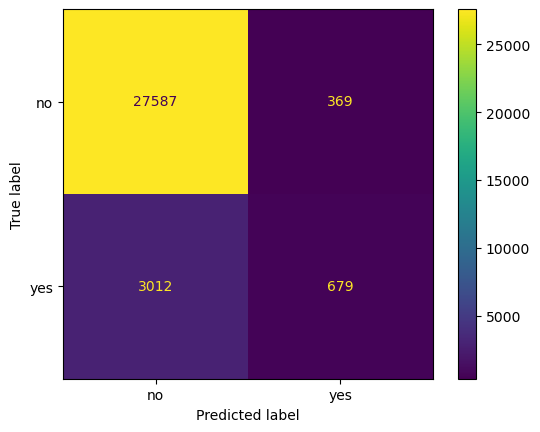

In [20]:
print("RESULTADO TREINO")

print(classification_report(y_train , y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)

RESULTADO TEST
              precision    recall  f1-score   support

          no       0.90      0.99      0.94     11966
         yes       0.65      0.19      0.29      1598

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.89      0.86     13564



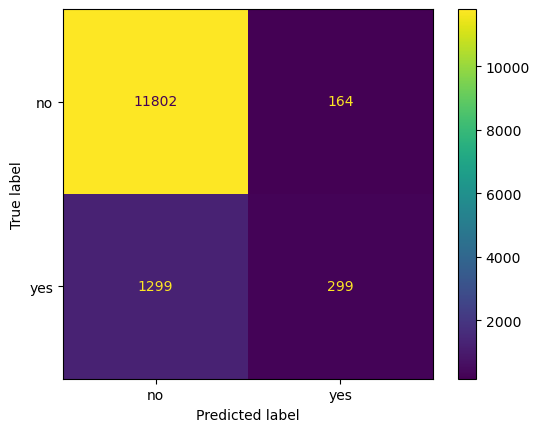

In [21]:
print("RESULTADO TEST")

print(classification_report(y_test , y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)